# Random Forest Model

In [6]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

df = pd.read_csv("kidney_Disease_Pre_processed.csv")
df.head(20)

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,40,3,3,1,0,0,0,1,1,...,32,36,31,0,0,1,1,1,1,0
1,1,5,0,3,4,0,0,0,1,1,...,26,20,0,1,1,1,1,1,1,0
2,2,54,3,1,2,3,0,0,1,1,...,19,34,0,1,0,1,0,1,0,0
3,3,40,2,0,4,0,0,1,0,1,...,20,26,18,0,1,1,0,0,0,0
4,4,43,3,1,2,0,0,0,1,1,...,23,32,25,1,1,1,1,1,1,0
5,5,52,4,2,3,0,0,0,1,1,...,27,36,23,0,0,1,1,0,1,0
6,6,60,2,1,0,0,0,0,1,1,...,24,0,0,1,1,1,1,1,1,0
7,7,17,3,2,2,4,0,1,1,1,...,32,28,29,1,0,1,1,0,1,0
8,8,44,5,2,3,0,0,1,0,1,...,21,52,19,0,0,1,1,1,0,0
9,9,45,4,3,2,0,1,1,0,1,...,17,71,16,0,0,1,0,1,0,0


### Train and Predict

In [10]:
x = df.drop('class',axis='columns')
y = df['class']
x

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0,40,3,3,1,0,0,0,1,1,...,90,32,36,31,0,0,1,1,1,1
1,1,5,0,3,4,0,0,0,1,1,...,49,26,20,0,1,1,1,1,1,1
2,2,54,3,1,2,3,0,0,1,1,...,32,19,34,0,1,0,1,0,1,0
3,3,40,2,0,4,0,0,1,0,1,...,48,20,26,18,0,1,1,0,0,0
4,4,43,3,1,2,0,0,0,1,1,...,52,23,32,25,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,0,0,1,1,...,93,35,26,28,1,1,1,1,1,1
396,396,34,2,4,0,0,0,0,1,1,...,101,42,36,41,1,1,1,1,1,1
397,397,8,3,3,0,0,0,0,1,1,...,94,37,25,33,1,1,1,1,1,1
398,398,11,1,4,0,0,0,0,1,1,...,78,39,31,38,1,1,1,1,1,1


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [23]:
model.score(x_test,y_test)

1.0

In [24]:
y_predicted = model.predict(x_test)

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[49,  0],
       [ 0, 31]])

Text(95.72222222222221, 0.5, 'Truth')

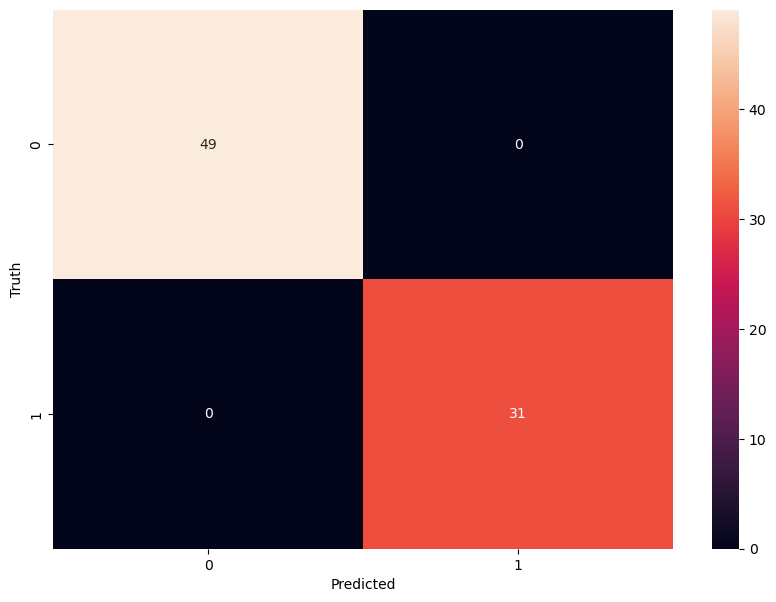

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')